# Tesla Stock Analysis


# Distance between Moving Average's and RL (real line) - daily closing price

SUMMARIZED FINDINGS (see testing below)

Based on the data we have gathered we can hyphotesize using the statistical information gathered from the SMA (distance betweem SMA and RL (real line) and make the following prediction. The next data point is likely to fall within a range of -100 (negative trend) and 149 (positive trend) at MOST based on this data. This is broad prediction.

SMA (distance) has the smallest mean value (6.93879892697548) wich is closest to zero and the small STD (32.472163177886955) compared to other MA's distances from RL. We can specify that it may be likely to fall within 6 or -6 distance of the RL.

The last closing price is 680.760010. Based on our investigation we can theorize the next data point to be within +6 or -6 of this value.



### DATA ANLYSIS BACKGROUND
We have used the powerful analytical library Pandas to analyze daily trends in Telsa stock between 2020-01-02 - 2021-06-29. Specifically, we have computed the Moving Averages of the daily Closing Price. 
Furthermore, we have calculated the distance between the MA's and the real line (daily closing price). This ISOLATED MA analysis should give some weight in approximating the next data point to fall with a certain range based on MA statistical data we have gathered. Further analysis and testing would be required here to find the best value or threshold point. Essentially, we can use this as an isolated technical indicator to help predict the trend. The purpose here is more so to get an understanding of how the MAs are calculated and what potential advantage they may give.

RESOURCES

https://www.alpharithms.com/autocorrelation-time-series-python-432909/
    
https://www.alpharithms.com/predicting-stock-prices-with-linear-regression-214618/
    
https://www.alpharithms.com/python-financial-data-491110/

In [1]:
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in CSV data to Dataframe
df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
1,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
3,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
4,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
...,...,...,...,...,...,...,...
371,2021-06-23,632.000000,657.200012,630.039978,656.570007,656.570007,31099200
372,2021-06-24,674.989990,697.619995,667.609985,679.820007,679.820007,45982400
373,2021-06-25,689.580017,693.809998,668.700012,671.869995,671.869995,32496700
374,2021-06-28,671.640015,694.700012,670.320007,688.719971,688.719971,21628200


### Moving Averages

Closing Price

In [3]:
# pythons built in moving average functions
df['SMA'] = df.iloc[:,4].rolling(window=10).mean() # -->> simple moving average.

# pythons in built Cumultive Moving Average function
df['CMA'] = df.iloc[:,4].expanding(min_periods=10).mean() # -->> cumaltive moving average

# Eponential Moving Average
df['EMA'] = df.iloc[:,4].ewm(span=40,adjust=False).mean() # -->> xxponential moving average

df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,CMA,EMA
0,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500,NaN,NaN,86.052002
1,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500,NaN,NaN,86.176392
2,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000,NaN,NaN,86.377934
3,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500,NaN,NaN,86.740571
4,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500,NaN,NaN,87.310690
...,...,...,...,...,...,...,...,...,...,...
371,2021-06-23,632.000000,657.200012,630.039978,656.570007,656.570007,31099200,618.295001,421.887091,627.441778
372,2021-06-24,674.989990,697.619995,667.609985,679.820007,679.820007,45982400,625.265002,422.578600,629.996814
373,2021-06-25,689.580017,693.809998,668.700012,671.869995,671.869995,32496700,631.463000,423.245155,632.039408
374,2021-06-28,671.640015,694.700012,670.320007,688.719971,688.719971,21628200,638.565997,423.953088,634.804314


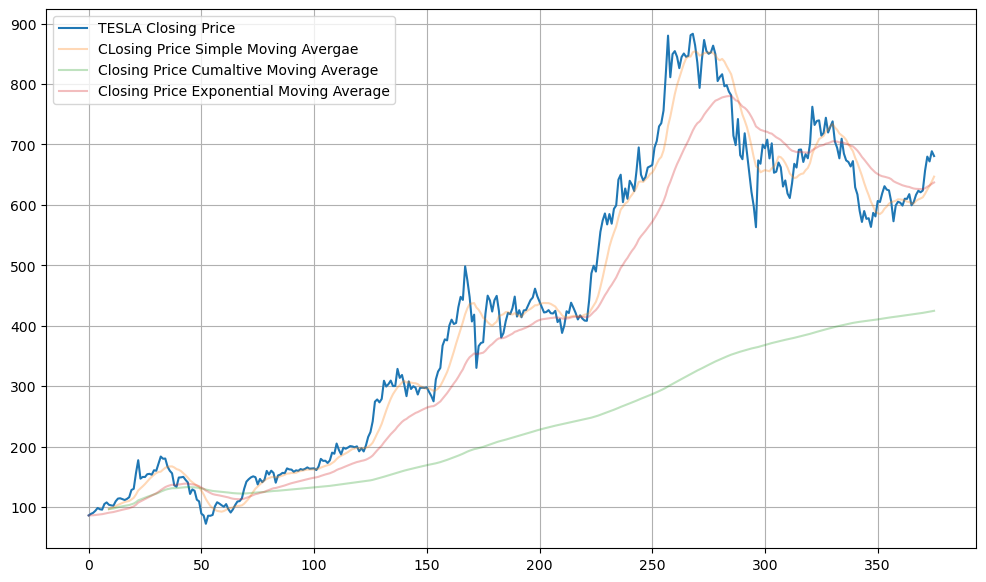

In [4]:
plt.figure(figsize=[12,7])
plt.grid(True)
plt.plot(df['Close'],label='TESLA Closing Price')
plt.plot(df['SMA'],label='CLosing Price Simple Moving Avergae',alpha=0.3)
plt.plot(df['CMA'],label='Closing Price Cumaltive Moving Average',alpha=0.3)
plt.plot(df['EMA'],label='Closing Price Exponential Moving Average',alpha=0.3)
plt.legend(loc=2)

### Rate of change (DISTANCE) between -->> Closing Price - Moving Averages

This analysis should give us insight into which moving average lies closer to the original data point. This will be helpful in forecasting the rate of change between MA's calculated which should give insight into the range where future data points will be located. Hence, being a forecasting indicator.

In [5]:
df['distance_close_sma'] = df.Close - df.SMA
df['distance_close_CMA'] = df.Close - df.CMA
df['distance_close_EMA'] = df.Close - df.EMA
df.tail() # tail() end of dataframe

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,CMA,EMA,distance_close_sma,distance_close_CMA,distance_close_EMA
371,2021-06-23,632.000000,657.200012,630.039978,656.570007,656.570007,31099200,618.295001,421.887091,627.441778,38.275006,234.682916,29.128229
372,2021-06-24,674.989990,697.619995,667.609985,679.820007,679.820007,45982400,625.265002,422.578600,629.996814,54.555005,257.241407,49.823193
373,2021-06-25,689.580017,693.809998,668.700012,671.869995,671.869995,32496700,631.463000,423.245155,632.039408,40.406995,248.624840,39.830587
374,2021-06-28,671.640015,694.700012,670.320007,688.719971,688.719971,21628200,638.565997,423.953088,634.804314,50.153974,264.766883,53.915657
375,2021-06-29,684.650024,687.510010,675.890015,680.760010,680.760010,17381300,646.706000,424.636085,637.046055,34.054010,256.123925,43.713955


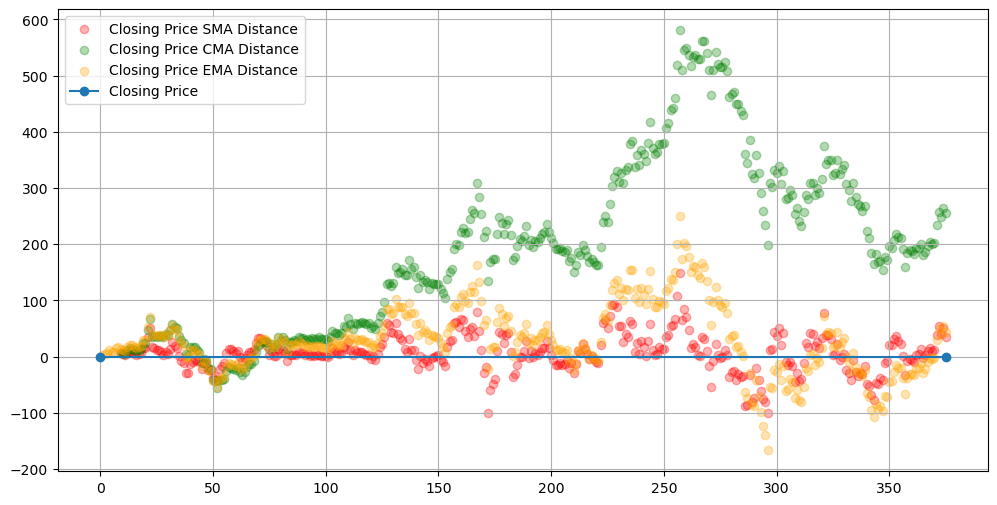

In [18]:
# data points which will sit along the x axis 
x1, y1 = [375,0], [0,0] 

plt.figure(figsize=[12,6])
plt.grid(True)
plt.scatter(df.index,df['distance_close_sma'],label='Closing Price SMA Distance',color='red',alpha=0.3)
plt.scatter(df.index,df['distance_close_CMA'],label='Closing Price CMA Distance',color='g',alpha=0.3)
plt.scatter(df.index,df['distance_close_EMA'],label='Closing Price EMA Distance',color='orange',alpha=0.3)
plt.plot(x1, y1,label='Closing Price', marker = 'o')
plt.legend(loc=2)

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SMA,CMA,EMA,distance_close_sma,distance_close_CMA,distance_close_EMA
count,376.000000,376.000000,376.000000,376.000000,376.000000,3.760000e+02,367.000000,367.000000,376.000000,367.000000,367.000000,376.000000
mean,424.390617,434.661936,413.058133,424.636085,424.636085,6.124636e+07,425.762868,239.927027,396.060595,6.938799,192.774640,28.575489
std,243.453518,247.774527,238.036734,243.365790,243.365790,3.926376e+07,240.780466,107.576912,239.509936,32.472163,152.235198,60.102376
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.515770e+07,92.254401,96.535599,86.052002,-100.904004,-56.628449,-166.765889
25%,166.563996,169.061500,162.170002,164.005505,164.005505,3.223282e+07,165.987598,132.884282,142.982287,-7.794406,44.346839,-4.490739
50%,420.705001,429.339996,409.759995,420.805008,420.805008,4.968475e+07,419.037799,219.208797,385.763705,6.037985,189.694789,22.177140
75%,643.062500,657.207504,621.007492,642.815002,642.815002,8.119912e+07,648.044498,349.802050,646.759045,23.072995,293.633726,55.774048
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08,854.024994,424.636085,780.063712,149.138019,580.461191,250.922762


### Subset Time

In [8]:
subset = df.iloc[340:-1,:]
subset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,CMA,EMA,distance_close_sma,distance_close_CMA,distance_close_EMA
370,2021-06-22,618.250000,628.570007,615.500000,623.710022,623.710022,19158900,612.516003,421.254522,625.948023,11.194019,202.455500,-2.238001
371,2021-06-23,632.000000,657.200012,630.039978,656.570007,656.570007,31099200,618.295001,421.887091,627.441778,38.275006,234.682916,29.128229
372,2021-06-24,674.989990,697.619995,667.609985,679.820007,679.820007,45982400,625.265002,422.578600,629.996814,54.555005,257.241407,49.823193
373,2021-06-25,689.580017,693.809998,668.700012,671.869995,671.869995,32496700,631.463000,423.245155,632.039408,40.406995,248.624840,39.830587
374,2021-06-28,671.640015,694.700012,670.320007,688.719971,688.719971,21628200,638.565997,423.953088,634.804314,50.153974,264.766883,53.915657


,Open,High,Low,Close,Adj Close,Volume,SMA,CMA,EMA,distance_close_sma,distance_close_CMA,distance_close_EMA
count,35.000000,35.000000,35.000000,35.000000,35.000000,3.500000e+01,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,610.777710,623.177424,599.811717,611.470860,611.470860,2.796724e+07,614.051317,414.371330,645.978755,-2.580457,197.099530,-34.507895
std,29.843778,29.180132,29.530603,29.103739,29.103739,7.996608e+06,22.397797,5.513080,19.926851,33.620322,25.806274,41.302480
min,552.549988,566.210022,546.979980,563.460022,563.460022,1.620530e+07,584.827008,405.307823,625.948023,-76.570996,154.561609,-107.640292
25%,596.824982,607.480011,578.600006,594.335022,594.335022,2.262255e+07,602.144507,409.653062,630.105277,-21.725977,182.292342,-68.301298
50%,607.309998,620.409973,598.229980,606.440002,606.440002,2.605340e+07,607.460004,414.392452,639.143032,2.659991,193.125042,-30.470869
75%,621.625000,629.850006,613.649994,623.510010,623.510010,3.244355e+07,621.780002,418.822417,655.221093,20.112494,209.009532,-13.810256
max,689.580017,697.619995,670.320007,688.719971,688.719971,4.650390e+07,677.996997,423.953088,693.439045,54.555005,264.766883,53.915657


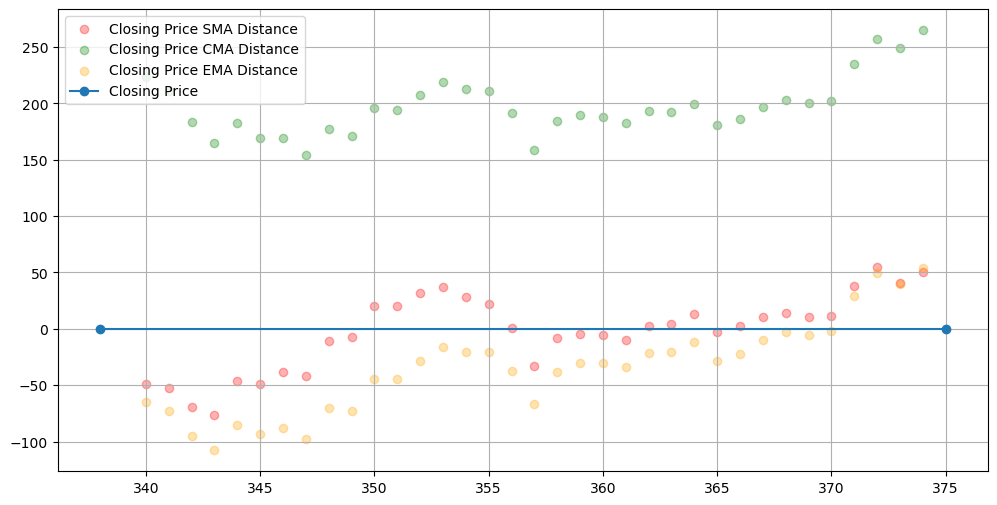

In [17]:
x1, y1 = [375,338], [0,0] # -->> data points which will sit along the x axis 

plt.figure(figsize=[12,6])
plt.grid(True)
plt.scatter(subset.index,subset['distance_close_sma'],label='Closing Price SMA Distance',color='red',alpha=0.3)
plt.scatter(subset.index,subset['distance_close_CMA'],label='Closing Price CMA Distance',color='green',alpha=0.3)
plt.scatter(subset.index,subset['distance_close_EMA'],label='Closing Price EMA Distance',color='orange',alpha=0.3)
plt.plot(x1, y1,label='Closing Price', marker = 'o')
plt.legend(loc=2)

display(subset.describe())

In [10]:
print(subset.SMA.max() - subset.SMA.min())

93.1699890000001


This plot enables us to observe the tail end difference between the Moving Averages and the actual line. We can infere from this plot that SMA is closest to the real data point. This could be an indicator for forecasting the next data point.

Focusing on the SMA the min range is 584.827008 and the max range is 677.996997 (subset of data). The last closing price is 688.719971 from the entire dataset so can we broadly approximate that the next data point will fall between the max - min SMA range (93.169) -->> of the latest Closing Price 688.719....

So we can either bet either way the next data point will trend downwards or updwards -->>
- 688 + 93
- 688 - 93

This is a very broad PREDICTION but with further testing and anlysis we should be able find a threshold value to leverage against !

In [11]:
# TEST
print(df.iloc[375:,4:5])

         Close
375  680.76001


### MACD (Moving Average Convergence Divergence)


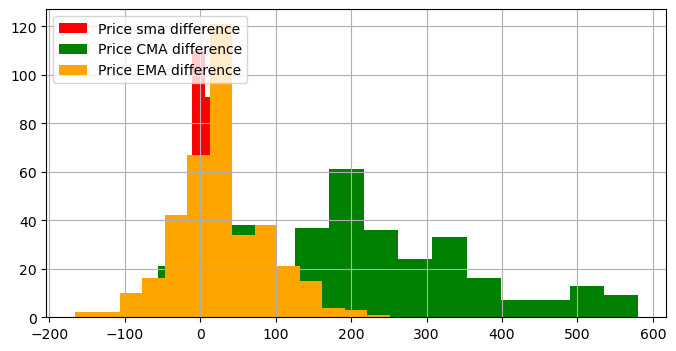

In [12]:
plt.figure(figsize=[8,4])
plt.grid(True)
plt.hist(df['distance_close_sma'], bins=14, label='Price sma difference',color='r')
plt.hist(df['distance_close_CMA'], bins=14, label='Price CMA difference',color='g')
plt.hist(df['distance_close_EMA'], bins=14, label='Price EMA difference',color='orange')
plt.legend(loc=2)


In [13]:
print(df.describe())

             Open        High         Low       Close   Adj Close  \
count  376.000000  376.000000  376.000000  376.000000  376.000000   
mean   424.390617  434.661936  413.058133  424.636085  424.636085   
std    243.453518  247.774527  238.036734  243.365790  243.365790   
min     74.940002   80.972000   70.101997   72.244003   72.244003   
25%    166.563996  169.061500  162.170002  164.005505  164.005505   
50%    420.705001  429.339996  409.759995  420.805008  420.805008   
75%    643.062500  657.207504  621.007492  642.815002  642.815002   
max    891.380005  900.400024  871.599976  883.090027  883.090027   

             Volume         SMA         CMA         EMA  distance_close_sma  \
count  3.760000e+02  367.000000  367.000000  376.000000          367.000000   
mean   6.124636e+07  425.762868  239.927027  396.060595            6.938799   
std    3.926376e+07  240.780466  107.576912  239.509936           32.472163   
min    1.515770e+07   92.254401   96.535599   86.052002       

STANDARD DEVIATION

Calculate the std for distance from MAs to real line.

In statistics, the standard deviation is a measure of the amount of variation of a random variable expected about its mean.[1] A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range. The standard deviation is commonly used in the determination of what constitutes an outlier and what does not.

In [21]:
print("DISTANCE SMA REAL LINE")
print(df['distance_close_sma'].min())
print(df['distance_close_sma'].max())
print(df['distance_close_sma'].max() - df['distance_close_sma'].min())
print(df['distance_close_sma'].mean())
print(df['distance_close_sma'].std())
print()


#
print("DISTANCE CMA REAL LINE")
print(df['distance_close_CMA'].min())
print(df['distance_close_CMA'].max())
print(df['distance_close_CMA'].max() - df['distance_close_CMA'].min())
print(df['distance_close_CMA'].mean())
print(df['distance_close_CMA'].std())
print()


#
print("DISTANCE EMA REAL LINE")
print(df['distance_close_EMA'].min())
print(df['distance_close_EMA'].max())
print(df['distance_close_EMA'].max() - df['distance_close_EMA'].min())
print(df['distance_close_EMA'].mean())
print(df['distance_close_EMA'].std())

DISTANCE SMA REAL LINE
-100.90400390000002
149.1380193
250.04202320000002
6.93879892697548
32.472163177886955

DISTANCE CMA REAL LINE
-56.62844920754718
580.4611909147287
637.0896401222759
192.77463968137596
152.23519759111056

DISTANCE EMA REAL LINE
-166.765889341969
250.92276245275514
417.68865179472414
28.5754894402081
60.1023762134605


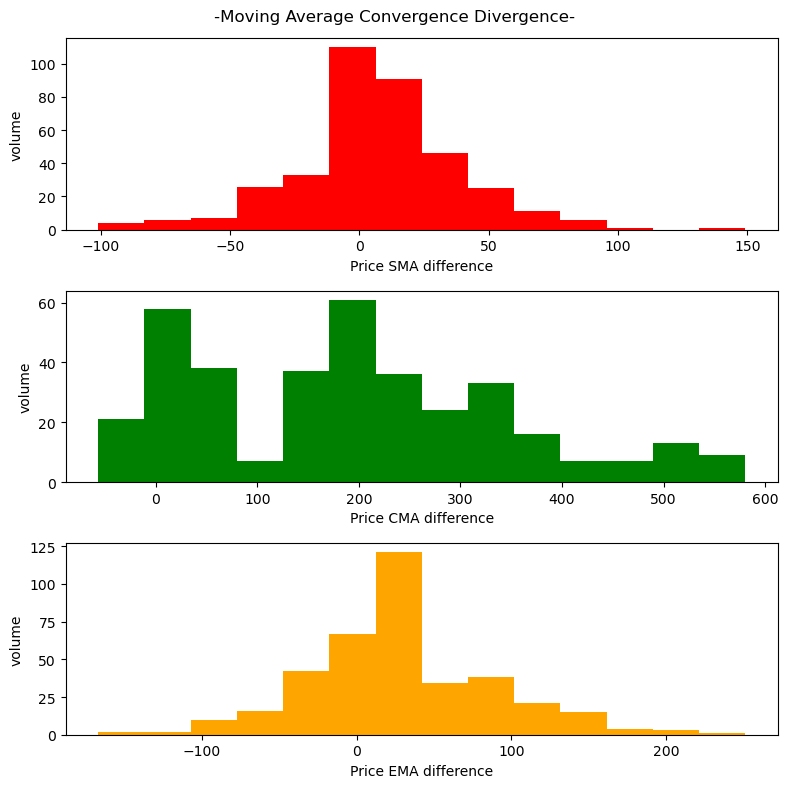

In [15]:
#Generate Bar Plots (Subplots)
fig, ax = plt.subplots(3, figsize = (8,8))
fig.suptitle('-Moving Average Convergence Divergence-', fontsize = 12)

ax[0].hist(df['distance_close_sma'], bins=14,color='r')
ax[1].hist(df['distance_close_CMA'], bins=14,color='g')
ax[2].hist(df['distance_close_EMA'], bins=14,color='orange')

#Set xlabe;s
ax[0].set_xlabel('Price SMA difference')
ax[1].set_xlabel('Price CMA difference')
ax[2].set_xlabel('Price EMA difference')
#set y labels
ax[0].set_ylabel('volume')
ax[1].set_ylabel('volume')
ax[2].set_ylabel('volume')

#Set spacing
fig.tight_layout()
plt.show()

### What use is this information ?

Based on the data we have gathered we can hyphotesize using the statistical information gathered from the SMA (distance betweem SMA and RL (real line) and make the following prediction. The next data point is likely to fall within a range of -100 (negative trend) and 149 (positive trend) at MOST based on this data. This is broad prediction.

SMA (distance) has the smallest mean value (6.93879892697548) wich is closest to zero and the small STD (32.472163177886955) compared to other MA's distances from RL. We can specify that it may be likely to fall within 6 or -6 distance of the RL.

The last closing price is 680.760010. Based on our investigation we can theorize the next data point to be within +6 or -6 of this value.

### Autocorrelation Function (ACF)

Enable user to isolate specific data of interest and compute the auto-correlation function.

Autocorrelation

Autocorrelation, also termed as serial correlation, refers to the degree of CORRELATION of the same feature between two successive time intervals. Similarily to correlation the value of autocorrelation ranges from -1 to 1. A value between -1 and 0 represents negative autocorrelation. A value between 0 and 1 represents positive autocorrelation.

Autocorrelation gives information about the trend within historical the data. Autocorrelation analysis measures the relationship of the observations between the different points in time, and thus seeks for a pattern or trend over the time series.

This is a useful tool for time series data analysis.

- Lag – the number of previous observations measured during autocorrelation.
- Positive Correlation – A relationship where one value’s increase predicts an increase in another.
- Negative Correlation – A relationship where one value’s increase predicts a decrease in another.
- Confidence Interval – A calculated range of values in which would likely contain an unknown value for sampled data.
- Confidence Level – Probability a confidence interval will contain an observed value.

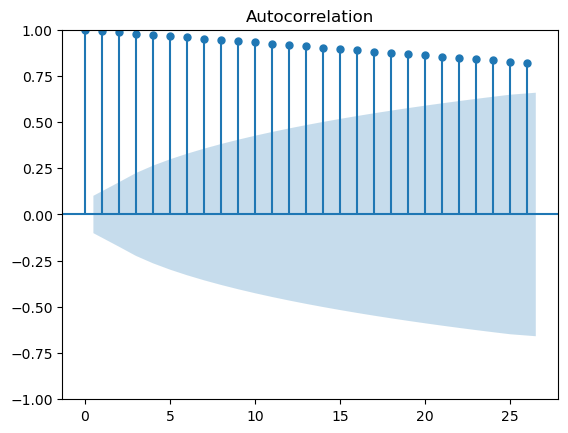

In [16]:
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Select relevant data, index by Date
data = df[['Date', 'Close']].set_index(['Date'])
# Calculate the ACF (via statsmodel)
plot_acf(data)
# Show the data as a plot (via matplotlib)
plt.show()